In [97]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

In [98]:
df = pd.read_csv('food_coded.csv')
df.keys()

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [99]:
df.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [100]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


In [101]:
df.dtypes

GPA                  object
Gender                int64
breakfast             int64
calories_chicken      int64
calories_day        float64
                     ...   
type_sports          object
veggies_day           int64
vitamins              int64
waffle_calories       int64
weight               object
Length: 61, dtype: object

In [140]:
dft = df.loc[:,['GPA','Gender','breakfast','calories_day','cook','diet_current_coded','drink','eating_out',
                'employment','exercise','income','marital_status','sports','vitamins',
                'on_off_campus','pay_meal_out','veggies_day']]

In [141]:
dft.head()

,GPA,Gender,breakfast,calories_day,cook,diet_current_coded,drink,eating_out,employment,exercise,income,marital_status,sports,vitamins,on_off_campus,pay_meal_out,veggies_day
0,2.4,2,1,NaN,2.0,1,1.0,3,3.0,1.0,5.0,1.0,1.0,1,1.0,2,5
1,3.654,1,1,3.0,3.0,2,2.0,2,2.0,1.0,4.0,2.0,1.0,2,1.0,4,4
2,3.3,1,1,4.0,1.0,3,1.0,2,3.0,2.0,6.0,2.0,2.0,1,2.0,3,5
3,3.2,1,1,3.0,2.0,2,2.0,2,3.0,3.0,6.0,2.0,2.0,1,1.0,2,3
4,3.5,1,1,2.0,1.0,2,2.0,2,2.0,1.0,6.0,1.0,1.0,2,1.0,4,4


In [142]:
dft = dft.apply(pd.to_numeric,errors='coerce')

In [231]:
dft = dft.fillna(dft.mean)

In [232]:
dft.isna().sum().sum()

0

In [233]:
dft.dtypes

GPA                   float64
Gender                  int64
breakfast               int64
calories_day          float64
cook                  float64
diet_current_coded      int64
drink                 float64
eating_out              int64
employment            float64
exercise              float64
income                float64
marital_status        float64
sports                float64
vitamins                int64
on_off_campus         float64
pay_meal_out            int64
veggies_day             int64
clusters                int32
dtype: object

<AxesSubplot: >

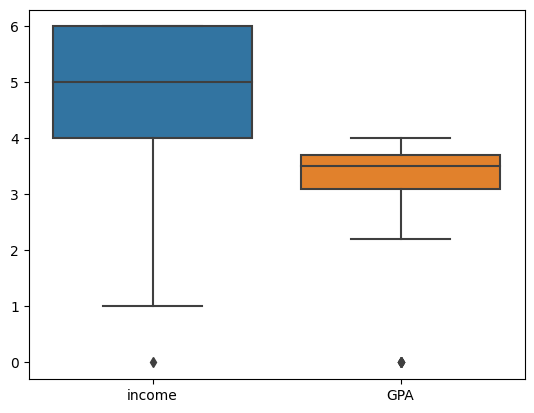

In [241]:
import seaborn as sns
sns.boxplot(data=dft[['income','GPA']])

In [235]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [236]:
X = np.array(dft[['income','GPA']].values)

In [242]:
kmeans = KMeans(n_clusters=cluster_size, init='k-means++', max_iter=500, n_init=10, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)
dft["clusters"]=labels

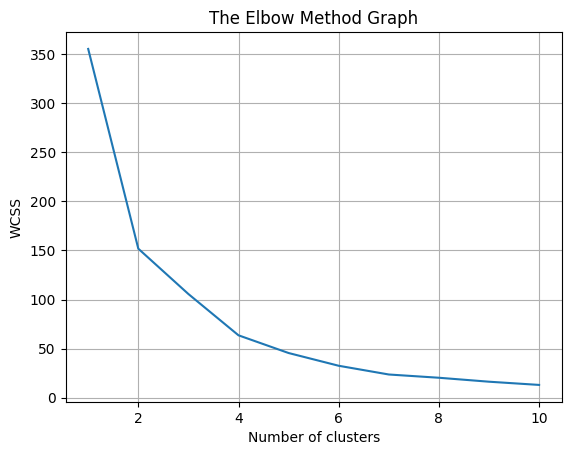

In [243]:
wcss = []
maxsize = 11
for cluster_size in range(1,maxsize):
    kmeans = KMeans(n_clusters=cluster_size, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,maxsize),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [244]:
optimal = 4
kmeans = KMeans(n_clusters=optimal, init='k-means++', max_iter=500, n_init=125, random_state=0)
y_kmeans = kmeans.fit_predict(X)

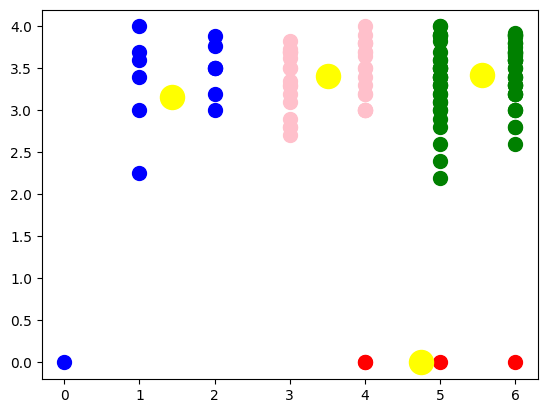

In [245]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3,0], X[y_kmeans==3,1], s=100, c='pink', label ='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.show()

In [273]:
import requests
def get(distance):
    coord = set()
    url = "https://api.foursquare.com/v3/places/search?ll=28.6347%2C77.3046&radius="+str(distance)+"&categories=12094&limit=50"
    headers = {
        "accept": "application/json",
        "Authorization": "[redacted]"
    }
    response = requests.request("GET",url, headers=headers)
    resp = response.json()
    for x in resp['results'] :
        #temp['lat'].append(x['geocodes']['main']['latitude'])
        #temp['lon'].append(x['geocodes']['main']['longitude'])
        coord.add((x['geocodes']['main']['latitude'],x['geocodes']['main']['longitude'],x['name']))
    return coord

In [274]:
final = set()
for distance in range(1000,21000,1000):
    final = final.union(get(distance))    
resd = dict()
resd['name'] = []
resd['lat'] = []
resd['lon'] = []
for (x,y,name) in final :
    resd['lat'].append(x)
    resd['lon'].append(y)
    resd['name'].append(name)
tdf = pd.DataFrame.from_dict(resd)
tdf.to_csv('ResidentialAreas.csv',index=0)
print("Residential Areas Marked")

Done


In [295]:
req_cat = {'Restaurant':13065,'Fruit and Vegetable':17067,'Grocery Store':17069,
           'Health and Medicine':15000,'Sweets and Snacks':13210,'Metro Station':19046}

def get_cat(x,y,category):
    url = "https://api.foursquare.com/v3/places/search?ll="+str(x)+"%2C"+str(y)+"&radius=1000&categories="+str(category)+"&limit=50"
    headers = {
        "accept": "application/json",
        "Authorization": "[redacted]"
    }
    response = requests.request("GET",url,headers=headers)
    resp = response.json()
    return len(resp['results'])

In [296]:
%%time
from time import sleep
import os
from IPython.display import display, clear_output
resd_cnt = dict()
resd_cnt['lat'] = tdf['lat']
resd_cnt['lon'] = tdf['lon']
for name in req_cat.keys():
    tmp = []
    for (x,y) in zip(tdf['lat'],tdf['lon']):
        tmp.append(get_cat(x,y,req_cat[name]))
        print("Processing",name,"for",x,y)
        clear_output(wait=True)
        sleep(2)
    resd_cnt[name]=tmp
rdf = pd.DataFrame.from_dict(resd_cnt)
rdf.to_csv("ResidentialAreasNeighbourhood.csv",index=0)
print("Neighbourhood of Each Residential Building Marked")

Neighbourhood of Each Residential Building Marked
CPU times: user 19.3 s, sys: 2.55 s, total: 21.9 s
Wall time: 3h 6min 22s


In [297]:
rdf.head()

,lat,lon,Restaurant,Fruit and Vegetable,Grocery Store,Health and Medicine,Sweets and Snacks,Metro Station
0,28.614908,77.337476,50,0,2,45,0,0
1,28.651353,77.297012,50,0,2,50,0,0
2,28.544250,77.370442,50,0,0,13,0,0
3,28.611455,77.295179,50,0,4,50,0,0
4,28.630080,77.434880,50,0,7,25,0,0


In [299]:
for i in range(len(resd_cnt['Fruit and Vegetable'])):
    resd_cnt['Grocery Store'][i]+=resd_cnt['Fruit and Vegetable'][i]
del resd_cnt['Fruit and Vegetable']
rdf = pd.DataFrame.from_dict(resd_cnt)
rdf.to_csv("ResidentialAreasNeighbourhood.csv",index=0)
print("Neighbourhood of Each Residential Building Marked")

Neighbourhood of Each Residential Building Marked


In [300]:
X = np.array(rdf[['Restaurant','Grocery Store','Health and Medicine']])

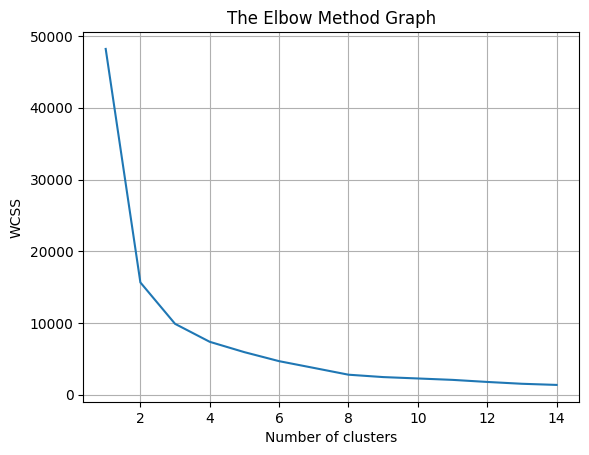

In [303]:
wcss = []
maxsize = 15
for cluster_size in range(1,maxsize):
    kmeans = KMeans(n_clusters=cluster_size, init='k-means++', max_iter=500, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,maxsize),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [311]:
optimal = 3
kmeans = KMeans(n_clusters=optimal, init='k-means++', max_iter=500, n_init=125, random_state=0)
y_kmeans = kmeans.fit_predict(X)
rdf['cluster']=y_kmeans

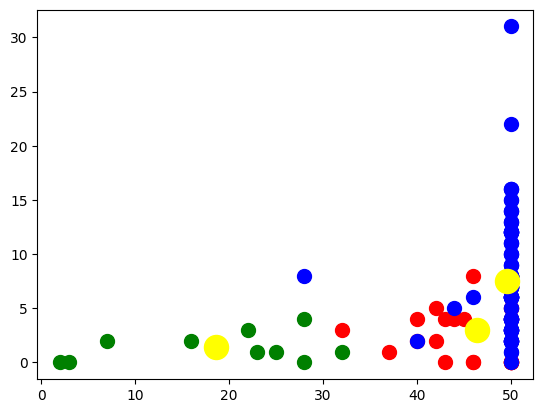

In [312]:
plt.scatter(X[y_kmeans==0,0], X[y_kmeans==0,1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1], s=100, c='green', label ='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.show()

In [314]:
data1 = rdf[rdf.cluster==0]
data2 = rdf[rdf.cluster==1]
data3 = rdf[rdf.cluster==2]

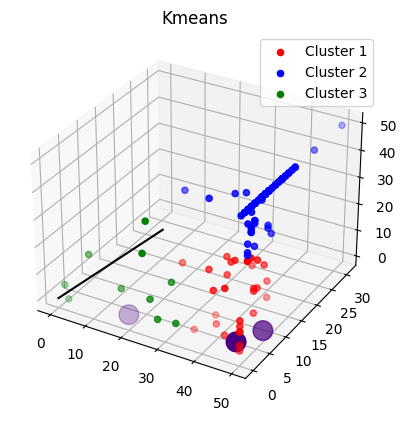

In [318]:
kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.Restaurant, data1['Grocery Store'], data1['Health and Medicine'], c='red', label = 'Cluster 1')
kplot.scatter3D(data2.Restaurant, data2['Grocery Store'], data2['Health and Medicine'], c='blue', label = 'Cluster 2')
kplot.scatter3D(data3.Restaurant, data3['Grocery Store'], data3['Health and Medicine'], c='green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()